In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
file_path = "average_by_country.csv"
df = pd.read_csv(file_path)
columns = df.columns[1:]


#  Distribution of Employment

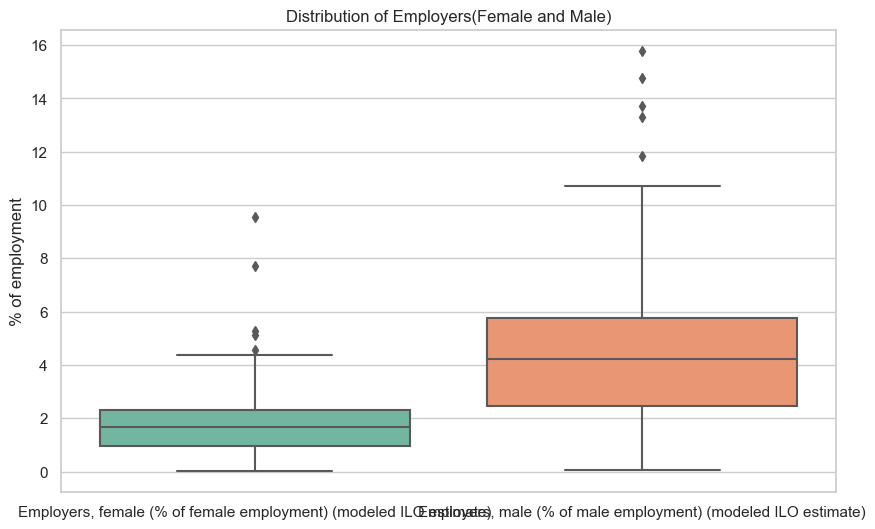

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = 'average_by_country.csv'




# Specify the columns you want to read
columns_to_read_2 = ['Employers, female (% of female employment) (modeled ILO estimate)', 'Employers, male (% of male employment) (modeled ILO estimate)']

# Read the CSV file with the specified columns
Employers = pd.read_csv(file_path, usecols=columns_to_read_2)

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=Employers, palette="Set2")

# Add labels and title
plt.title('Distribution of Employers(Female and Male)')
plt.ylabel('% of employment')

# Show the plot
plt.show()






# Employment to population ratio, 15+

In [12]:
#Employment to population ratio, 15+


import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("average_by_country.csv")

# Select a subset of indicators for the plot
indicators_to_plot = [
    'Employment to population ratio, 15+, female (%) (modeled ILO estimate)',
    'Employment to population ratio, 15+, male (%) (modeled ILO estimate)'
]

# Create a list to store DataFrames for each subset
subset_dfs = []



# Divide the countries into 10 parts
countries_per_subplot = len(df) // 10
for i in range(10):
    start_idx = i * countries_per_subplot
    end_idx = (i + 1) * countries_per_subplot if i < 9 else len(df)
    
    df_subset = df.iloc[start_idx:end_idx]
    df_plot_part = df_subset.set_index('country_name')[indicators_to_plot]
    
    # Plot horizontal bar chart for selected indicators
    df_plot_part.plot(kind='barh', ax=axes[i], colormap='viridis')
    
    axes[i].set_title(f"Subset {i + 1}")
    axes[i].set_ylabel("Country")
    axes[i].legend(title="Indicators", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Store the subset DataFrame in the list
    subset_dfs.append(df_subset)

    
    
    





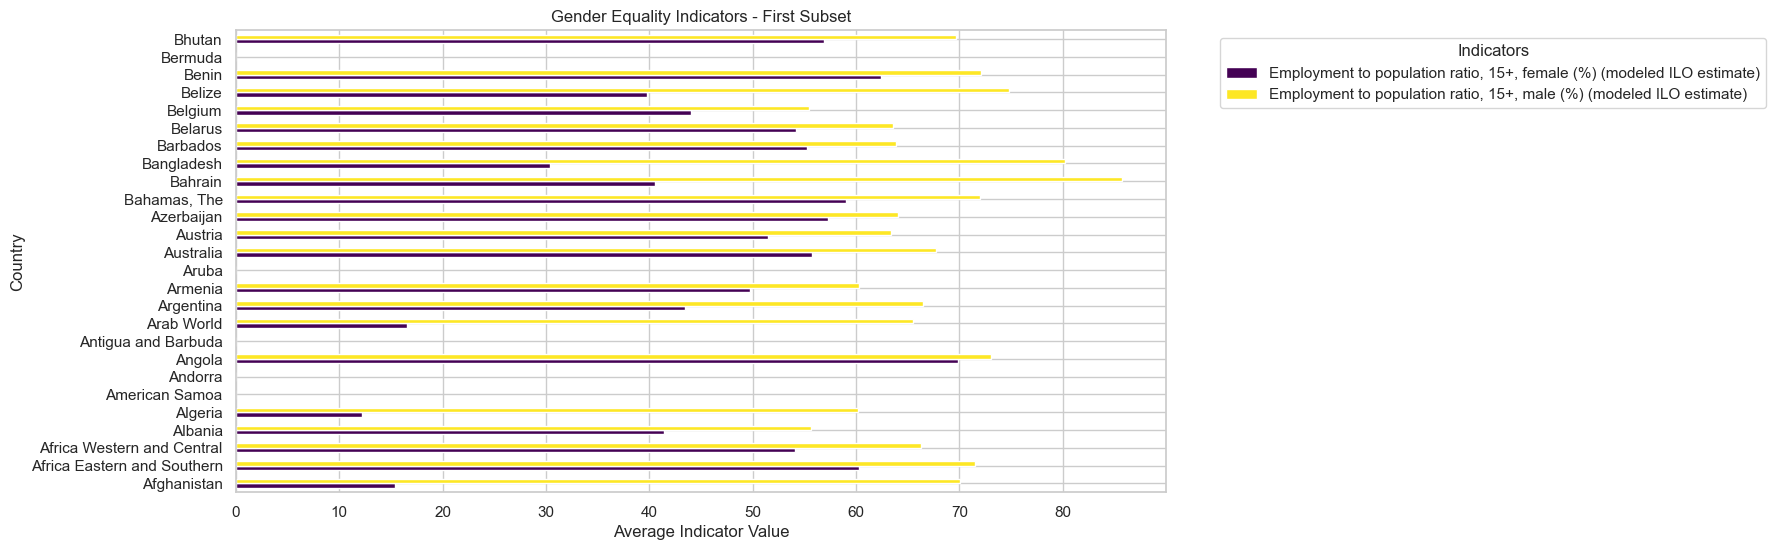

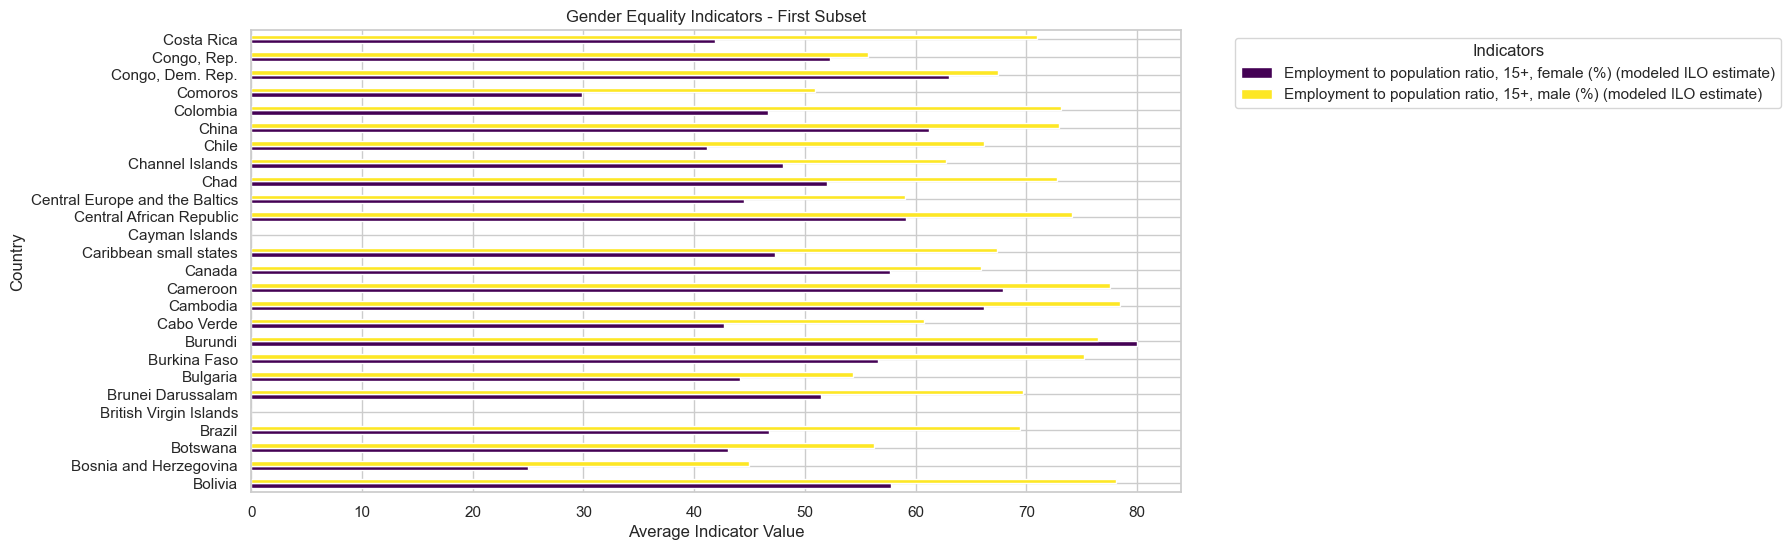

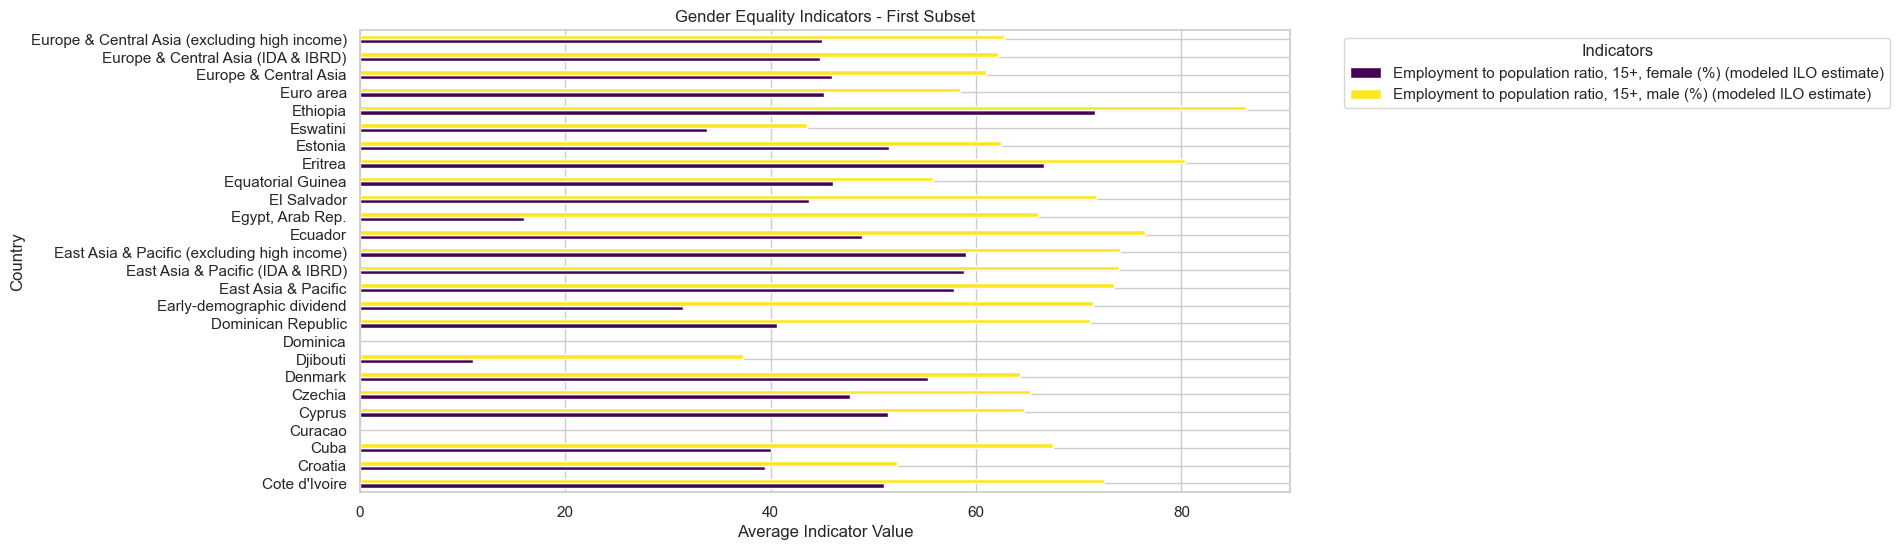

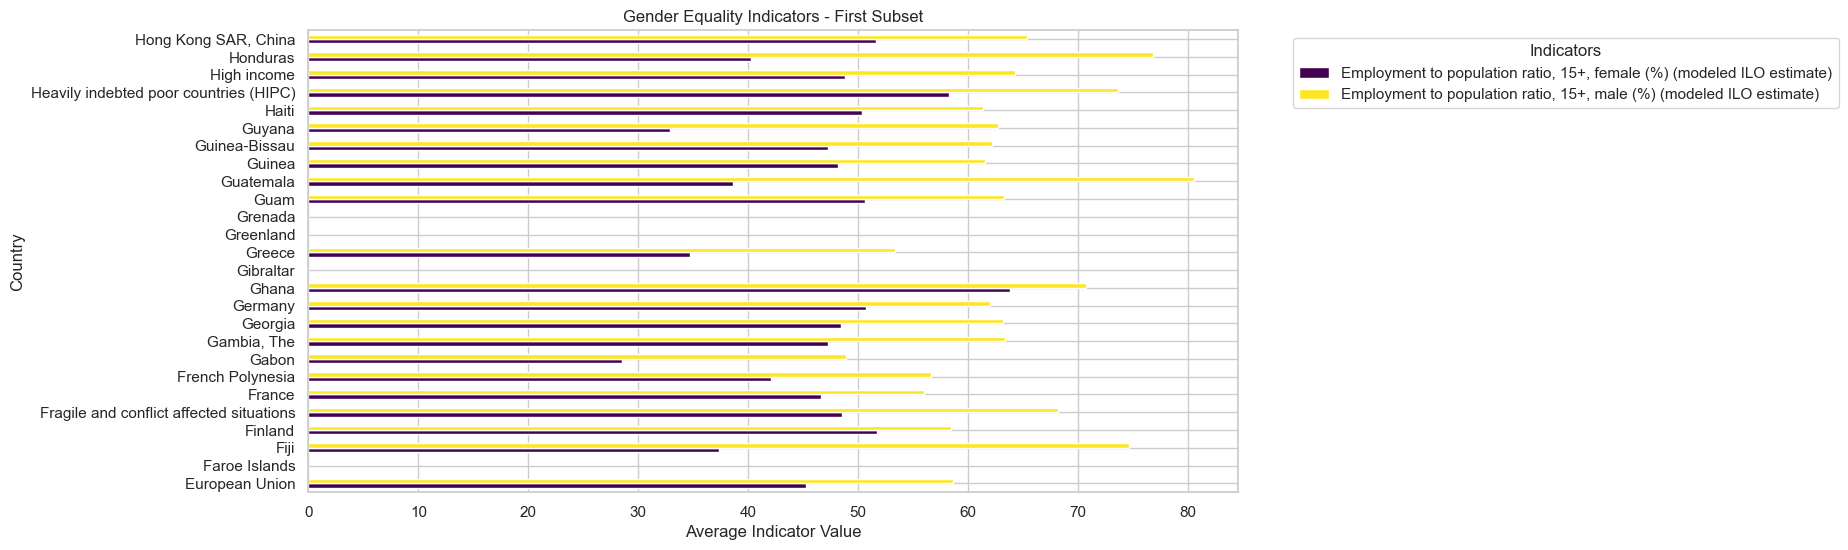

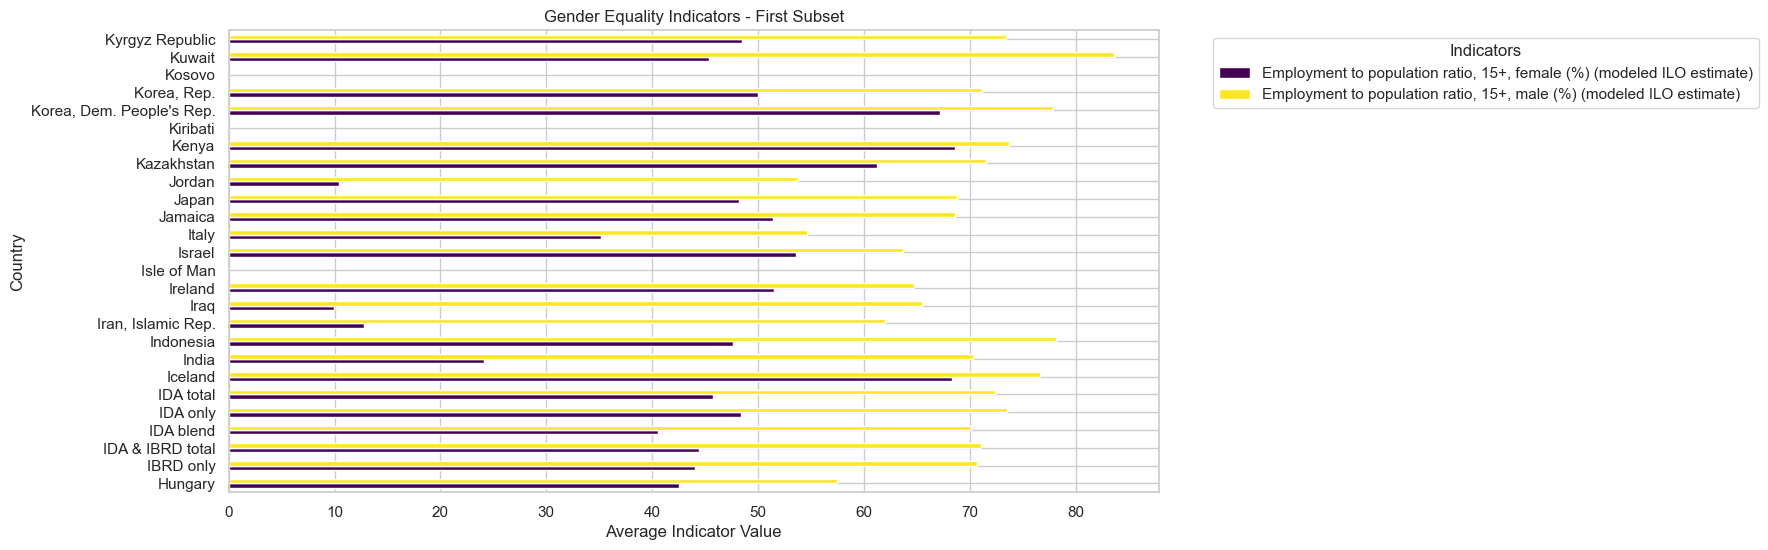

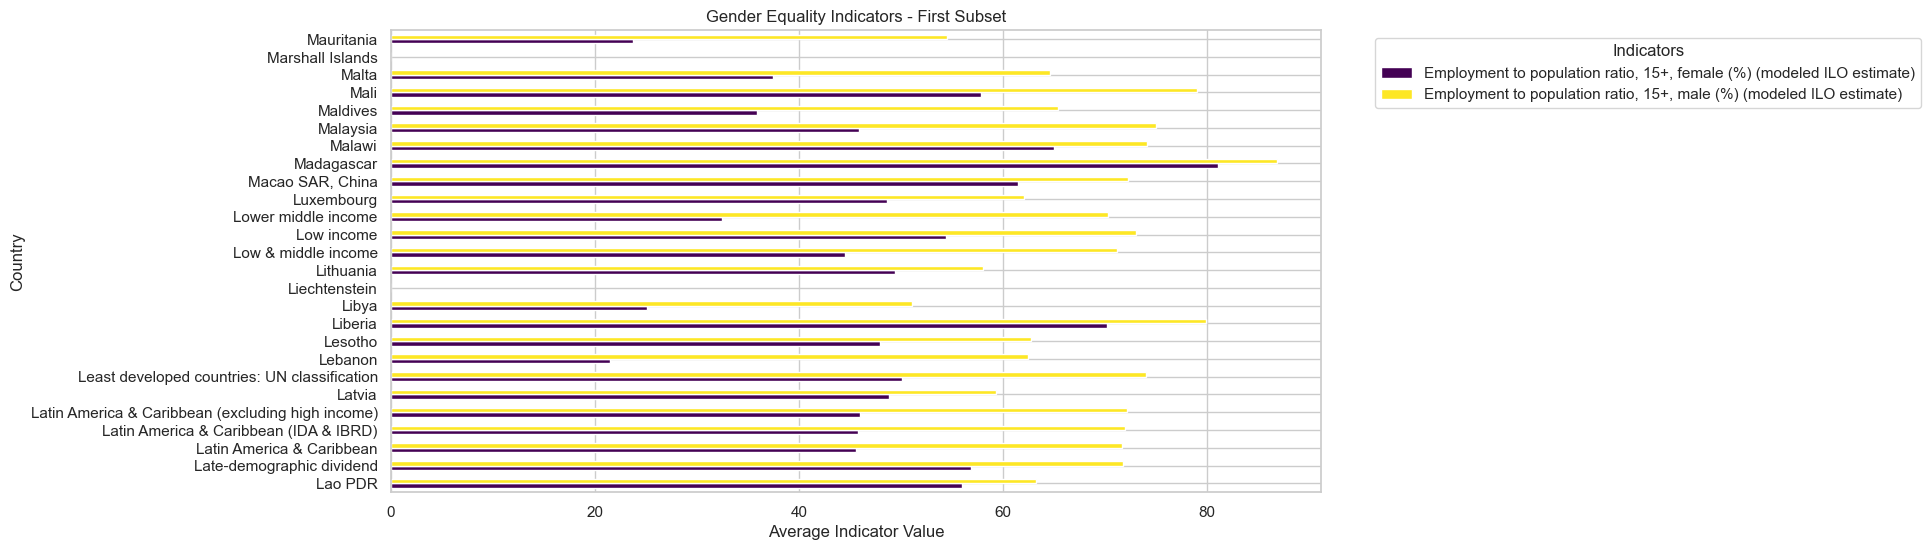

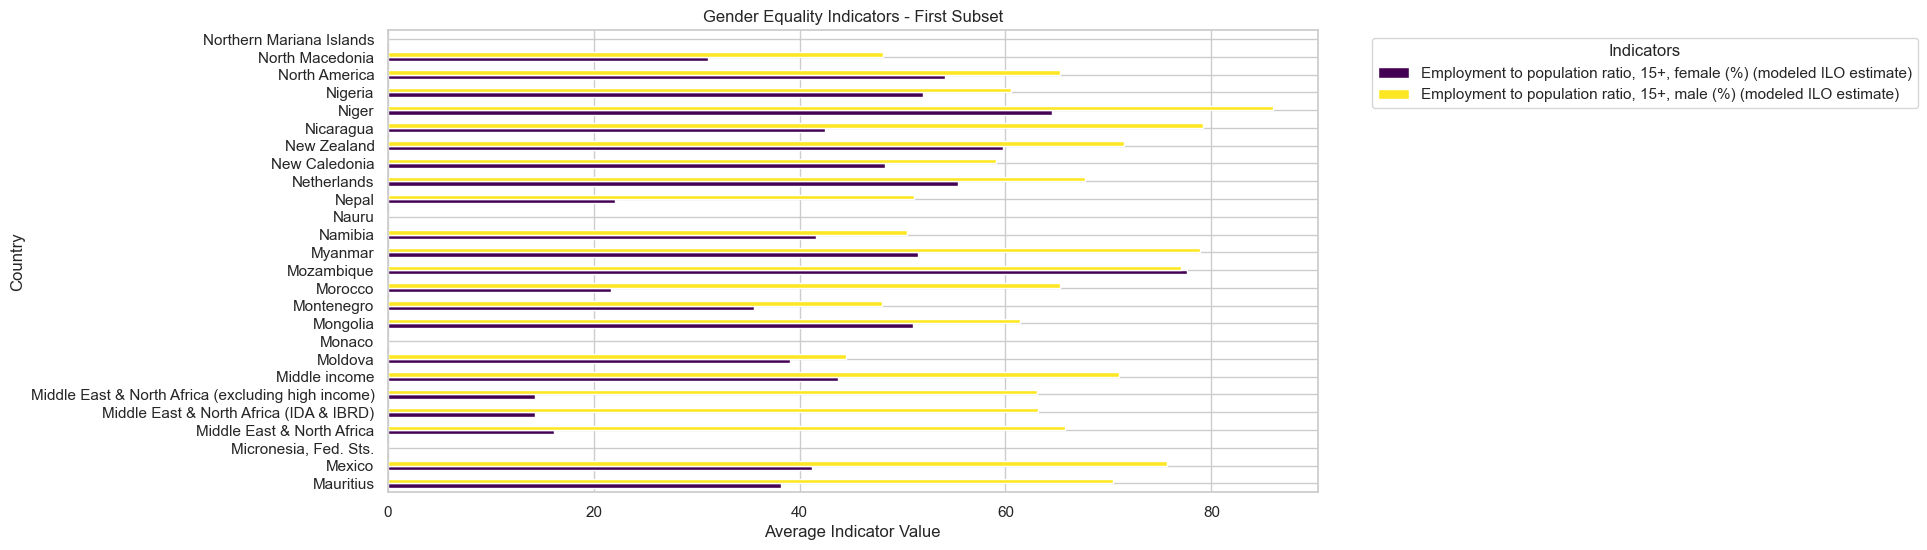

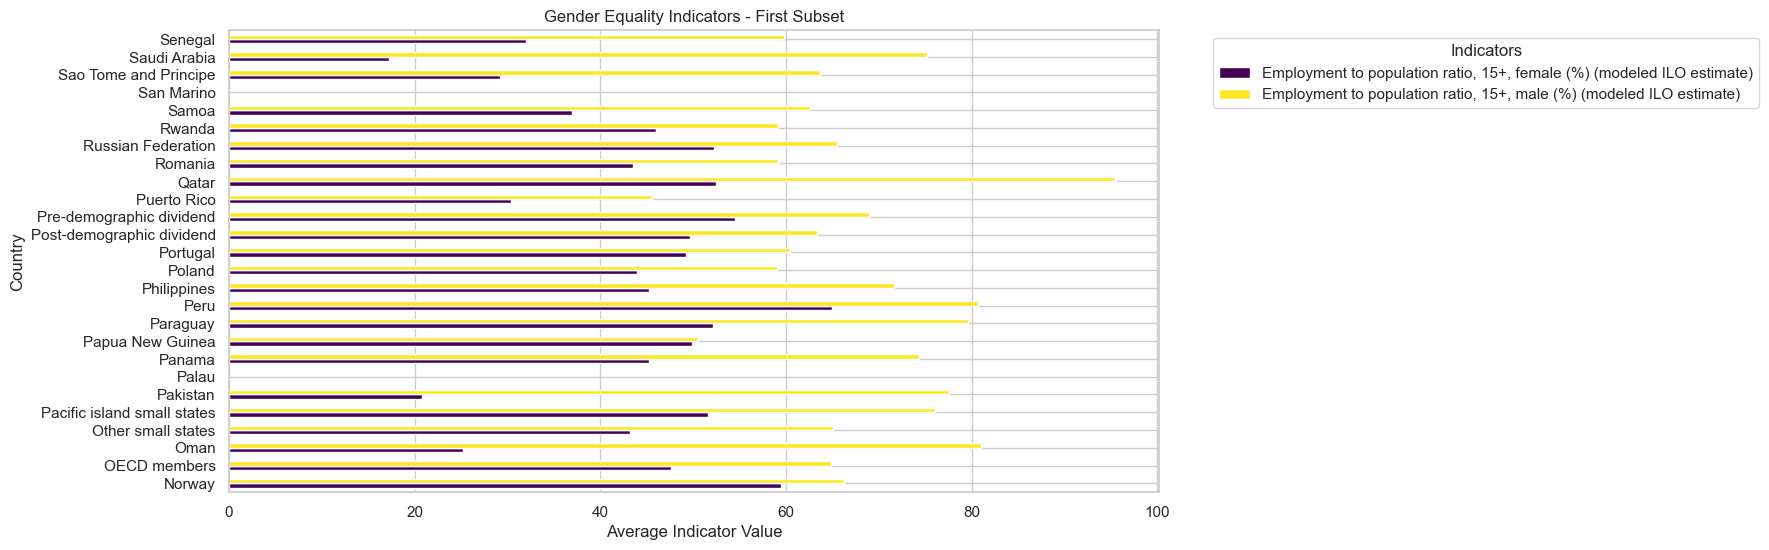

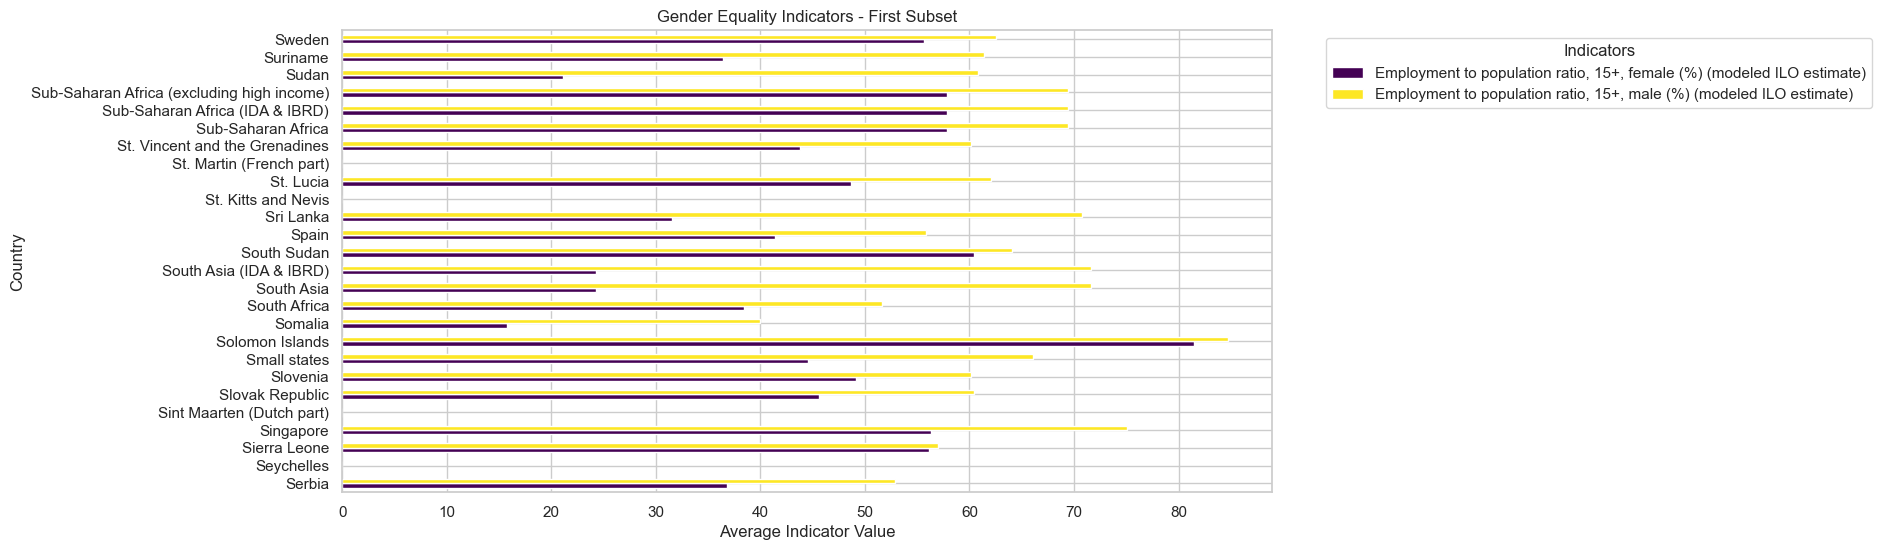

In [13]:

for x in range(9):

    dataset = subset_dfs[x]

    fig, ax = plt.subplots(figsize=(12, 6))
    df_plot_first = dataset.set_index('country_name')[indicators_to_plot]
    df_plot_first.plot(kind='barh', ax=ax, colormap='viridis')
    plt.title("Gender Equality Indicators - First Subset")
    plt.xlabel("Average Indicator Value")
    plt.ylabel("Country")
    plt.legend(title="Indicators", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


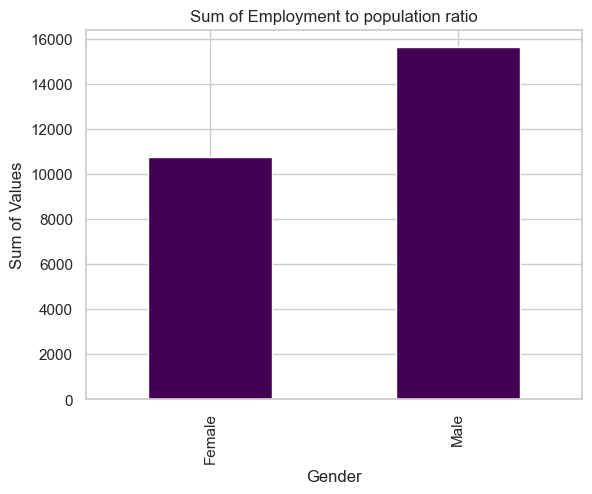

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("average_by_country.csv")

# Select indicators for the plot
indicators_to_plot = [
    'Employment to population ratio, 15+, female (%) (modeled ILO estimate)',
    'Employment to population ratio, 15+, male (%) (modeled ILO estimate)'
]

# Sum values across all countries for each indicator
sum_female_education = df[indicators_to_plot[0]].sum()
sum_male_education = df[indicators_to_plot[1]].sum()

# Create a DataFrame for the sums
df_sums = pd.DataFrame({
    'Indicator': indicators_to_plot,
    'Sum': [sum_female_education, sum_male_education]
})

# Map the 'Indicator' values to 'Female' and 'Male'
df_sums['Indicator'] = df_sums['Indicator'].map({
    indicators_to_plot[0]: 'Female',
    indicators_to_plot[1]: 'Male'
})

# Plot bar chart for the sums
df_sums.plot(kind='bar', x='Indicator', y='Sum', legend=False, colormap='viridis')
plt.title("Sum of Employment to population ratio")
plt.xlabel("Gender")
plt.ylabel("Sum of Values")
plt.show()



# intentional homicides

In [ ]:
#intentional homicides

#Expected years of schooling


import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("average_by_country.csv")

# Select a subset of indicators for the plot
indicators_to_plot = [
'Intentional homicides, female (per 100,000 female)', 'Intentional homicides, male (per 100,000 male)'

]

# Plot horizontal bar chart for selected indicators
df_plot = df.set_index('country_name')[indicators_to_plot]
df_plot.plot(kind='barh', figsize=(12, 10), colormap='viridis')
plt.title("Gender Equality Indicators Across Countries")
plt.xlabel("Average Indicator Value")
plt.ylabel("Country")
plt.legend(title="Indicators", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Load your dataset
df = pd.read_csv("average_by_country.csv")

# Select indicators for the plot
indicators_to_plot = [ 'Intentional homicides, female (per 100,000 female)', 'Intentional homicides, male (per 100,000 male)'
]

# Sum values across all countries for each indicator
sum_female_education = df[indicators_to_plot[0]].sum()
sum_male_education = df[indicators_to_plot[1]].sum()

# Create a DataFrame for the sums
df_sums = pd.DataFrame({
    'Indicator': indicators_to_plot,
    'Sum': [sum_female_education, sum_male_education]
})

# Plot bar chart for the sums
df_sums.plot(kind='bar', x='Indicator', y='Sum', legend=False, colormap='viridis')
plt.title("Sum of Intentional homicides")
plt.xlabel("Indicator")
plt.ylabel("Sum of Values")
plt.show()




# Relationship between GDP Growth and Female Employment Ratio

Correlation Coefficient: 0.08


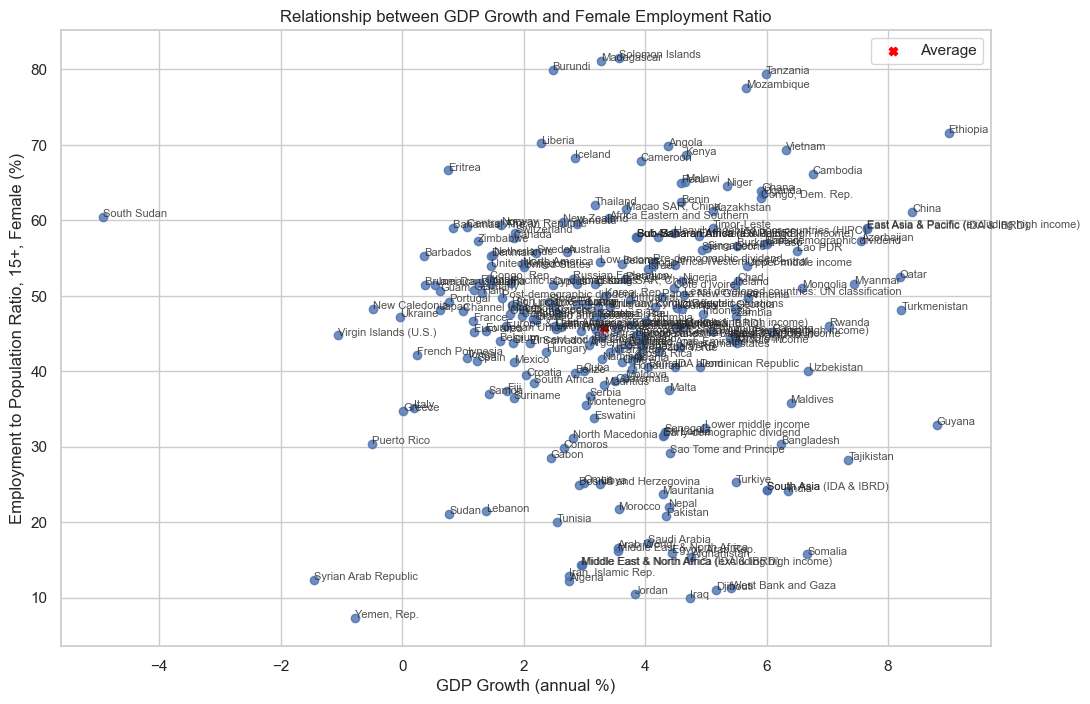

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("average_by_country.csv")

# Select indicators for the plot
x_indicator = "GDP growth (annual %)"
y_indicator = "Employment to population ratio, 15+, female (%) (modeled ILO estimate)"

# Calculate the correlation coefficient
correlation_coefficient = df[x_indicator].corr(df[y_indicator])

# Plot scatter plot with country names
plt.figure(figsize=(12, 8))
plt.scatter(df[x_indicator], df[y_indicator], alpha=0.8)

# Annotate each point with country name
for i, country in enumerate(df['country_name']):
    plt.annotate(country, (df[x_indicator].iloc[i], df[y_indicator].iloc[i]), fontsize=8, alpha=0.8)

# Plot average point
average_gdp_growth = df[x_indicator].mean()
average_female_employment = df[y_indicator].mean()
plt.scatter(average_gdp_growth, average_female_employment, color='red', marker='X', label='Average')

plt.title("Relationship between GDP Growth and Female Employment Ratio")
plt.xlabel("GDP Growth (annual %)")
plt.ylabel("Employment to Population Ratio, 15+, Female (%)")
plt.grid(True)
plt.legend()

# Display the correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

plt.show()


# Correlation

In [16]:
import pandas as pd

# Load your dataset
df = pd.read_csv("average_by_country.csv")



# Identify columns containing the specified string
columns_to_drop = [col for col in df.columns if "(1=yes; 0=no)" in col]

# Drop the identified columns
df = df.drop(columns=columns_to_drop)

# Get all column names
columns = df.columns

# Calculate correlation coefficients for all pairs of columns
correlation_results = []
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        column1 = columns[i]
        column2 = columns[j]

        # Check if columns contain numeric data, if not, try to convert
        try:
            df[column1] = pd.to_numeric(df[column1])
            df[column2] = pd.to_numeric(df[column2])
        except ValueError:
            continue

        correlation_coefficient = df[column1].corr(df[column2])
        correlation_results.append((column1, column2, correlation_coefficient))

# Sort the results by correlation coefficient in descending order
correlation_results.sort(key=lambda x: abs(x[2]), reverse=True)

# Display the top 5 correlations
print("Top 10 Correlations:")
for result in correlation_results[:10]:
    print(f"{result[0]} and {result[1]}: {result[2]:.2f}")


Top 10 Correlations:
Rural population (% of total population) and Urban population (% of total population): -1.00
Self-employed, total (% of total employment) (modeled ILO estimate) and Wage and salaried workers, total (% of total employment) (modeled ILO estimate): -1.00
Self-employed, female (% of female employment) (modeled ILO estimate) and Wage and salaried workers, female (% of female employment) (modeled ILO estimate): -1.00
Self-employed, male (% of male employment) (modeled ILO estimate) and Wage and salaried workers, male (% of male employment) (modeled ILO estimate): -1.00
Cost of business start-up procedures (% of GNI per capita) and Cost of business start-up procedures, female (% of GNI per capita): 1.00
Cost of business start-up procedures (% of GNI per capita) and Cost of business start-up procedures, male (% of GNI per capita): 1.00
Cost of business start-up procedures, female (% of GNI per capita) and Cost of business start-up procedures, male (% of GNI per capita): 1.